In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [4]:
# Import the necessary libraries
import os
from PIL import Image
import numpy as np

d_train = []

# assign directory
directory = './data/train/notumor'
 
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        # Open the image
        image = Image.open(f).convert('L')
        image = image.resize((160,160))

        # Convert the image to a NumPy array
        image_array = np.array(image)
        d_train.append([image_array,0])

# assign directory
directory = './data/train/tumor'
 
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        # Open the image
        image = Image.open(f).convert('L')
        image = image.resize((160,160))
        # Convert the image to a NumPy array
        image_array = np.array(image)
        d_train.append([image_array,1])

In [5]:
d_test = []

# assign directory
directory = './data/test/notumor'
 
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        # Open the image
        image = Image.open(f).convert('L')
        image = image.resize((160,160))

        # Convert the image to a NumPy array
        image_array = np.array(image)
        d_test.append([image_array, 0])

# assign directory
directory = './data/test/tumor'
 
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        # Open the image
        image = Image.open(f).convert('L')
        image = image.resize((160,160))
        # Convert the image to a NumPy array
        image_array = np.array(image)
        d_test.append([image_array, 1])

In [6]:
random.seed(0)
random.shuffle(d_train)
random.shuffle(d_test)
x_train_t, y_train_t = zip(*d_train)
x_test_t, y_test_t = zip(*d_test) 

In [7]:
x_train = np.asarray(x_train_t)
y_train = np.asarray(y_train_t)
x_test = np.asarray(x_test_t)
y_test = np.asarray(y_test_t)

In [8]:
x_val = x_train[2000:]
y_val = y_train[2000:]

x_train = x_train[:2000]
y_train = y_train[:2000]

In [9]:
x_train = np.array(x_train, dtype='float32')
x_test = np.array(x_test, dtype='float32')
x_val = np.array(x_val, dtype='float32')
y_train = np.array(y_train, dtype='float32')
y_test = np.array(y_test, dtype='float32')
y_val = np.array(y_val, dtype='float32')

In [10]:
for i in range(len(x_train)):
    x_train[i] = x_train[i]/255
    
for i in range(len(x_test)):
    x_test[i] = x_test[i]/255

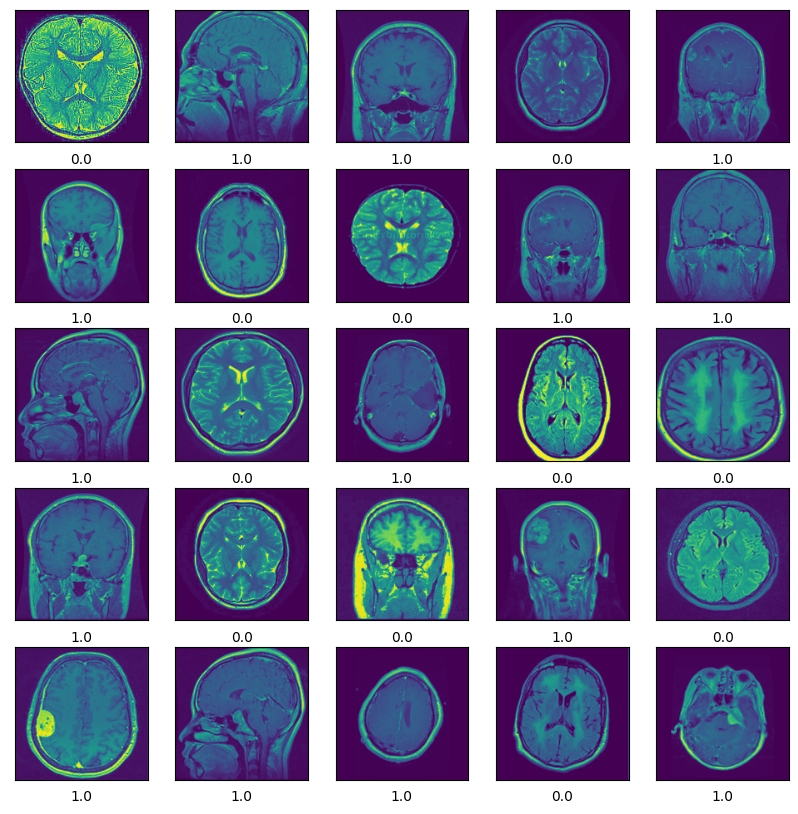

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i+25])
    plt.xlabel(y_train[i+25])
plt.show()

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

model = Sequential([Flatten(input_shape = [160, 160]),
                    Dense(300, activation = "relu" ),
Dense(100, activation = "relu" ),
Dense(100, activation = "relu" ),
Dense(100, activation = "relu" ),
Dense(10, activation = "softmax" )])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 25600)             0         
                                                                 
 dense (Dense)               (None, 300)               7680300   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 7,731,610
Trainable params: 7,731,610
Non-

In [13]:
model.compile(loss = "sparse_categorical_crossentropy",
optimizer = "sgd",
metrics = ["accuracy"])

In [14]:
history = model.fit(x_train,
                    y_train,
                    epochs = 10,
                    validation_data = (x_val, y_val))

Epoch 1/10
63/63 [==============================] - 3s 35ms/step - loss: 0.9402 - accuracy: 0.5235 - val_loss: 77.4933 - val_accuracy: 0.4871
Epoch 2/10
63/63 [==============================] - 2s 32ms/step - loss: 0.6524 - accuracy: 0.6380 - val_loss: 16.9088 - val_accuracy: 0.8128
Epoch 3/10
63/63 [==============================] - 2s 32ms/step - loss: 0.5527 - accuracy: 0.7400 - val_loss: 60.3198 - val_accuracy: 0.6552
Epoch 4/10
63/63 [==============================] - 2s 33ms/step - loss: 0.4601 - accuracy: 0.7900 - val_loss: 40.1254 - val_accuracy: 0.8300
Epoch 5/10
63/63 [==============================] - 2s 32ms/step - loss: 0.4224 - accuracy: 0.8280 - val_loss: 40.9095 - val_accuracy: 0.8453
Epoch 6/10
63/63 [==============================] - 2s 33ms/step - loss: 0.3824 - accuracy: 0.8495 - val_loss: 60.9626 - val_accuracy: 0.7861
Epoch 7/10
63/63 [==============================] - 2s 32ms/step - loss: 0.3443 - accuracy: 0.8785 - val_loss: 68.9823 - val_accuracy: 0.6409
Epoch 

In [15]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.3949 - accuracy: 0.8200


[0.39493414759635925, 0.8199999928474426]

In [ ]:
model.save('model.h5')